In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import nltk

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

from nltk.corpus import stopwords
# stopwords.words("english")

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import string
# string.punctuation

from collections import Counter 


# Data Cleaning

In [3]:
df = pd.read_csv("./spam.csv", encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={"v2":"statements"},inplace=True)
df.rename(columns={"v1":"target"},inplace=True)

In [8]:
df.head()

,target,statements
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
encoder = LabelEncoder()
df["target"]= encoder.fit_transform(df["target"])

In [10]:
df.head()

,target,statements
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df["num_of_chars"]=df["statements"].apply(len)

In [12]:
df.head()

,target,statements,num_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
df["num_of_words"]=df["statements"].apply(lambda x: len(nltk.word_tokenize(x)))

In [14]:
df.head()

,target,statements,num_of_chars,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [15]:
df["num_of_sentences"]=df["statements"].apply(lambda x: len(nltk.sent_tokenize(x)))   # this will break into long sentences 

In [16]:
df.head()

,target,statements,num_of_chars,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


**now we will create a diagram and visualize that out of the 3 new col created which is the most efficent to to choosen**

# EDA exploratory data analysis

In [17]:
df["target"].value_counts()  #this counts number o ham and spams

target
0    4825
1     747
Name: count, dtype: int64

<Axes: xlabel='num_of_chars', ylabel='Count'>

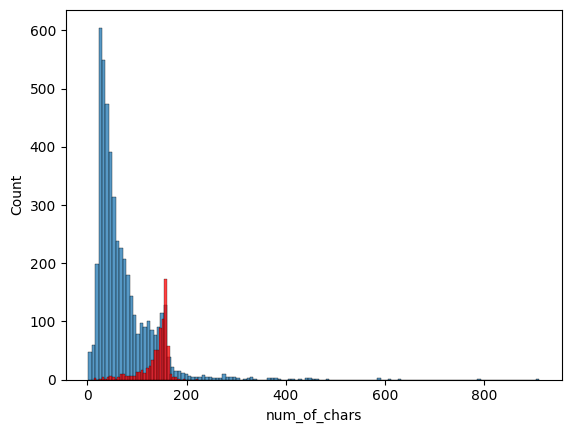

In [18]:
sns.histplot(df[df["target"] == 0 ]["num_of_chars"])
sns.histplot(df[df["target"] ==1 ]["num_of_chars"],color="red")


# from diagram we see that there are very less num of chars in the messages which are spam . 

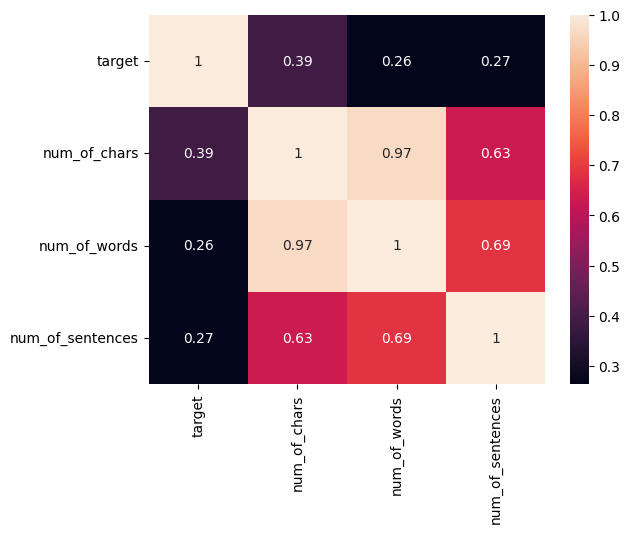

In [19]:
# annot=>annotation , corr=>correlation

numeric_df = df.select_dtypes(include=['number'])   # only numeric columns
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

# Data PreProcessing

In [20]:
def transform_text(statements):
    statements = statements.lower()
    statements = nltk.word_tokenize(statements)

    y=[]
    for i in statements:
        if i.isalnum():
            y.append(i)

    statements = y[:]
    y.clear()

    for i in statements:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    statements = y[:]
    y.clear()

    for i in statements:
        y.append(ps.stem(i))
    return " ".join(y) 

In [21]:
transform_text("I LovE running from the top <and i will WIn,suresh kumar is a looser")

'love run top win suresh kumar looser'

In [22]:
df["transformed_text"] = df["statements"].apply(transform_text)

In [23]:
df.head()

,target,statements,num_of_chars,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


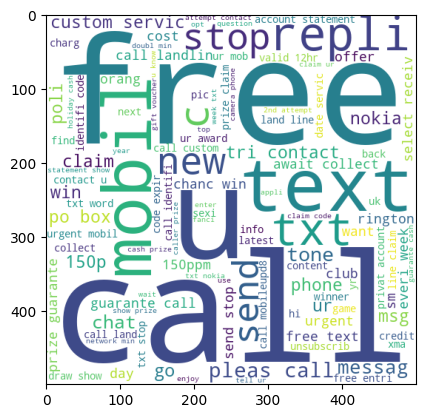

In [24]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

# .str.cat(sep=" "))  => string.concatenate (join together) .sep means seperator using space
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))  
plt.imshow(spam_wc)  # image for spam texts 

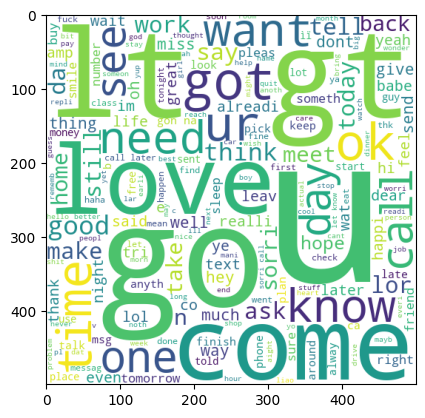

In [25]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))  
plt.imshow(ham_wc) # text for real messages

In [26]:
spam_corpus=[]
for msg in df[df["target"] ==1]["transformed_text"]:
    for word in msg.split():
        spam_corpus.append(word)

In [27]:
len(spam_corpus)

11490

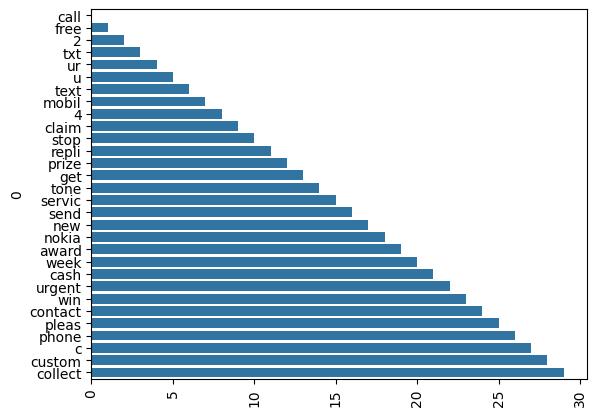

In [28]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
# this gives us the count of the most repeated words in it 

plt.xticks(rotation='vertical')
plt.show()

In [29]:
ham_corpus=[]
for msg in df[df["target"] ==0]["transformed_text"]:
    for word in msg.split():
        ham_corpus.append(word)

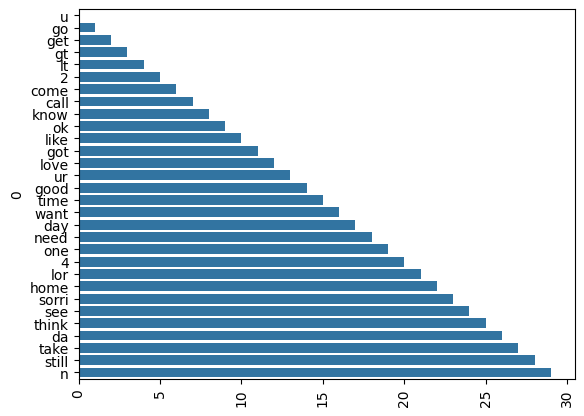

In [30]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [70]:
# Naive baise is the best for text type of data

In [71]:
# this method is of baggage of wrods ... weher most common words are taken into picture . other method is Tf-IDF

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [72]:
# X = cv.fit_transform(df["transformed_text"]).toarray()

In [73]:
# y = df["target"].values

In [74]:
# X,y

In [75]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Naive Bayes mthod**

In [76]:
# most commonly used NB's ... we will try all of them to see which one gives the best results
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB   
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix

In [77]:
# gnb = GaussianNB()
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# acc = accuracy_score(y_test,y_pred1)
# pre = precision_score(y_test,y_pred1)
# conf = confusion_matrix(y_test,y_pred1)
# acc,pre,conf

In [78]:
# mnb = MultinomialNB()
# mnb.fit(X_train,y_train)
# y_pred2 = mnb.predict(X_test)
# acc = accuracy_score(y_test,y_pred2)
# pre = precision_score(y_test,y_pred2)
# conf = confusion_matrix(y_test,y_pred2)
# acc,pre,conf

In [79]:
# bnb = BernoulliNB()
# bnb.fit(X_test,y_test)
# y_pred3 = bnb.predict(X_test)
# acc = accuracy_score(y_test,y_pred3)
# pre = precision_score(y_test,y_pred3)
# conf = confusion_matrix(y_test,y_pred3)
# acc,pre,conf

**Tf-IDF method**

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [81]:
# Xt = tfidf.fit_transform(df["transformed_text"]).toarray()
# yt = df["target"].values
# Xt,yt

In [82]:
# from sklearn.model_selection import train_test_split
# Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size = 0.2,random_state=42)

In [83]:
# GNB = GaussianNB()
# GNB.fit(Xt_train,yt_train)
# y_pred4 = GNB.predict(Xt_test)
# acc = accuracy_score(yt_test,y_pred4)
# pre = precision_score(yt_test,y_pred4)
# conf = confusion_matrix(yt_test,y_pred4)
# acc,pre,conf

In [84]:
# BNB = BernoulliNB()
# BNB.fit(Xt_train,yt_train)
# y_pred6 = BNB.predict(Xt_test)
# acc = accuracy_score(yt_test,y_pred6)
# pre = precision_score(yt_test,y_pred6)
# conf = confusion_matrix(yt_test,y_pred6)
# acc,pre,conf

In [85]:
# MNB = MultinomialNB()
# MNB.fit(Xt_train,yt_train)
# y_pred5 = MNB.predict(Xt_test)
# acc = accuracy_score(yt_test,y_pred5)
# pre = precision_score(yt_test,y_pred5)
# conf = confusion_matrix(yt_test,y_pred5)
# acc,pre,conf

**from both Tf-IDF and Bagging techniqe we can conclude that the best output which we can get for our results will be ***MultinomialNB using Tf-IDF*** for Best results**

In [86]:
tfidfMAX = TfidfVectorizer(max_features=3000)

X = tfidfMAX.fit_transform(df["transformed_text"]).toarray()
y = df["target"].values
X,y


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

MNB = MultinomialNB()
MNB.fit(X_train,y_train)
y_pred5 = MNB.predict(X_test)
acc = accuracy_score(y_test,y_pred5)
pre = precision_score(y_test,y_pred5)
conf = confusion_matrix(y_test,y_pred5)
acc,pre,conf


(0.9775784753363229,
 1.0,
 array([[965,   0],
        [ 25, 125]]))

**before using max_features =3000 use were getting slighltly less accuray  ... hence we used max_features to get a better accuary thenn before .
*Note:* max_features is applied on tfidf Muntinomial only not on others**

# Improving Models Performance

In [87]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [88]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [89]:
# # these are all the classifiers as mentioned above stored in a dict 

# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc
#     # 'BgC': bc, 
#     # 'ETC': etc,
#     # 'GBDT':gbdt,
#     # 'xgb':xgb
# }

we just have tested only 2 types of classification for out text there are many others ways also, to let us know which can be more reliable we will run a loop through all the types and will create a table to compare whose accuracy and prescision is more ... one with best results will be used for training


In [90]:
# def model_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred7 = clf.predict(X_test)
#     acc = accuracy_score(y_test,y_pred7)
#     pre = precision_score(y_test,y_pred7)

#     return acc , pre

In [91]:
# just checking if the funcition is working properly or no
model_classifier(xgb,X_train,y_train,X_test,y_test)   

(0.9668161434977578, 0.9747899159663865)

In [92]:
# just checking different and their accuracy and precision

# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = model_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [93]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [94]:
# performance_df 

**There are ways with which i can use different classifer as 1... Like voting & Stacking**

In [95]:
# # Voting

# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

# voting.fit(X_train,y_train)



In [96]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [97]:
# # stacking

# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

# from sklearn.ensemble import StackingClassifier

# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))


Why do we need .pkl files?

    Reuse without retraining

    Training a model (or fitting a vectorizer) takes time and resources.

    Once trained, you "freeze" them into .pkl files. Next time, you just load them and use them directly.

Deployment

    Suppose you are building a spam classifier web app.
    
    Your web app can simply load model.pkl + vectorizer.pkl and immediately start predicting.
    
    No need to retrain the model every time the app restarts.

In [98]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(MNB,open('model.pkl','wb'))

In [99]:
performance_df 

,Algorithm,Accuracy,Precision
1,KN,0.921973,1.000000
5,RF,0.976682,1.000000
3,DT,0.926457,0.985714
4,LR,0.978475,0.984615
6,AdaBoost,0.926457,0.947368
2,NB,0.978475,0.925676
0,SVC,0.913004,0.675497


In [104]:
def predict_message(message, model, vectorizer):
    """
    Predicts if a given message is spam or not.
    message: str - the input text
    model: trained ML model
    vectorizer: the text vectorizer used in training
    """
    # Transform the message using the trained vectorizer
    message_vec = vectorizer.transform([message])
    
    # Predict
    prediction = model.predict(message_vec)[0]
    
    # Map result
    return "SPAM" if prediction == 1 else "NOT SPAM"


# Example usage
user_input = input("Enter a message: ")
print("Result:", predict_message(user_input, MNB, tfidfMAX))

Result: NOT SPAM
